
<center><font size =7>Classification</font size></center>

<h1><center>Introduction</center></h1>


Classification has been used throughout all of human history. The food groups are an example of classification. Apples are fruits and cakes are desserts. Classification is used by humans to simplify the information that is needed to be remembered. From the previous example, fruits are generally healthy, whereas desserts are not. Therefore, if an unknown food can be classified into a fruit or dessert, then a person can have a general knowledge of the unknown food. The idea of classification plays an important role in machine learning algorithms.


Classification is the systematic arrangement of objects into categories that have similar traits. Classification may be a simple easy to understand term; however, there are a plethora of different ways to go about classifying computationally. In this text, three specific types of computational classification are discussed, K-Nearest Neighbors, Decision Tree, and Logistic Regression. Note that there are several other types that are not mentioned. This types are not mentioned strickly because of the space constraint of this text.






<h1><center>K-Nearest Neighbors</center></h1>


K-Nearest Neighbors (KNN) is one of the simplest and oldest methods of classification. In 1951, Evelyn Fix and J.L. Hodges Jr. wrote the first known technical report of what is now know as KNN. KNN classifies every unlabeled data points by the majority label among its K-Nearest Neighbors. To find the K-Nearest Neighbor, KNN uses the Euclidean distance to determine the closest set of data points to any example with an unknown label. The Euclidean distance is shown below.

$$
D = \sqrt{(a_1-a_0)^2+(b_1-b_0)^2+(c_1-c_0)^2+...} 
$$

The user tells KNN the number of data points that is needed to determine the unknown label. Then based on that number of closest data points, the unknown label is predicted to be the majority label.

<h1><center>Examples of K-Nearest Neighbors</center></h1>

The following is an example of how KNN works in two dimensions. Given the table and graph below, determine the label of the unknown point $(1.5,3)$ for 1, 3, and 5 nearest neighbors. This problem can be done by using a programming language. However, this problem was design to be done by hand, or using a graphing software.

+-----+-----+---------+
|   X |   Y |   Label |
+=====+=====+=========+
| 0   |   0 |       0 |
+-----+-----+---------+
| 1   |   2 |       0 |
+-----+-----+---------+
| 1   |   4 |       0 |
+-----+-----+---------+
| 3   |   4 |       1 |
+-----+-----+---------+
| 2   |   3 |       1 |
+-----+-----+---------+
| 2.5 |   2 |       1 |
+-----+-----+---------+


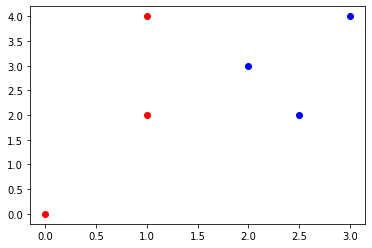

In [ ]:
#Import Packages
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
#Unknown Point
unknownPoint = [1.5,3]
#Create Array
array = np.zeros((6,3))
array[:,:] = [[0,0,0],[1,2,0],[1,4,0],[3,4,1],[2,3,1],[2.5,2,1]]
head = ['X', 'Y','Label']
#Display Table
print(tabulate(array, headers=head, tablefmt="grid"))
#Scatter Plot
plt.scatter(array[0:3,0],array[0:3,1],color='red')
plt.scatter(array[3:,0],array[3:,1],color='blue')
plt.show()

<h2>Answer</h2>

The first task is to determine the closest point to the unknown point. Using the table find all of the Euclidean distances from each point to the unknown point.

For the first point (0,0)
$$
D = \sqrt{(1.5-0)^2+(3-0)^2}
$$
$$
D = 3.354 
$$
The second point (1,2)
$$
D = \sqrt{(1.5-1)^2+(3-2)^2}
$$
$$
D = 1.118
$$
The third point (1,4)
$$
D = \sqrt{(1.5-1)^2+(3-4)^2}
$$
$$
D = 1.118
$$
The fourth point (3,4)
$$
D = \sqrt{(1.5-3)^2+(3-4)^2}
$$
$$
D = 1.803
$$
The fifth point (2,3)
$$
D = \sqrt{(1.5-2)^2+(3-3)^2}
$$
$$
D = 0.5
$$
The sixth point (2.5,2)
$$
D = \sqrt{(1.5-2.5)^2+(3-2)^2}
$$
$$
D = 1.414
$$

In [ ]:
distances = np.zeros((6,3))
distances[:,:] = [[1,np.sqrt((1.5-0)**2+(3-0)**2),0],[2,np.sqrt((1.5-1)**2+(3-2)**2),0],[3,np.sqrt((1.5-1)**2+(3-4)**2),0],
                  [4,np.sqrt((1.5-3)**2+(3-4)**2),1],[5,np.sqrt((1.5-2)**2+(3-3)**2),1],[6,np.sqrt((1.5-2.5)**2+(3-2)**2),1]]
head = ['Point', 'Distance','Label']
print(tabulate(distances, headers=head, tablefmt="grid"))

+---------+------------+---------+
|   Point |   Distance |   Label |
+=========+============+=========+
|       1 |    3.3541  |       0 |
+---------+------------+---------+
|       2 |    1.11803 |       0 |
+---------+------------+---------+
|       3 |    1.11803 |       0 |
+---------+------------+---------+
|       4 |    1.80278 |       1 |
+---------+------------+---------+
|       5 |    0.5     |       1 |
+---------+------------+---------+
|       6 |    1.41421 |       1 |
+---------+------------+---------+


The table above shows that point 5 is the closest point to the unknown point. Based off only using one nearest neighbor, the label of the unknown point would be 1. However, if the three closest neighbors are used, points 2, 3, and 5, then the label of the unknown point would be 0. This result happens because a majority of the nearest neighbors have a zero label. For the five nearest neighbors, all points except point 1, the label of the unknown point is 1. This is the process that the K-Nearest Neighbors algorithm is designed to do. Below are visual representations of the three different numbers of nearest neighbors.

<h2>One Nearest Neighbor</h2>

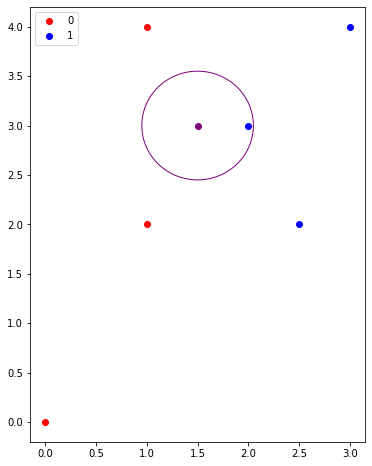

In [ ]:
plt.figure(figsize=(6,8))
plt.scatter(array[0:3,0],array[0:3,1],color='red')
plt.scatter(array[3:,0],array[3:,1],color='blue')
plt.scatter(unknownPoint[0],unknownPoint[1],color='purple')
circle = plt.Circle((unknownPoint[0], unknownPoint[1]), 0.55, color='purple', fill=False)
plt.gcf().gca().add_artist(circle)
plt.legend(['0','1'])
plt.show()

The graph above shows the closest nearest neighbor. If KNN is used the label for the unknown point would be 1.

<h2>Three Nearest Neighbors</h2>

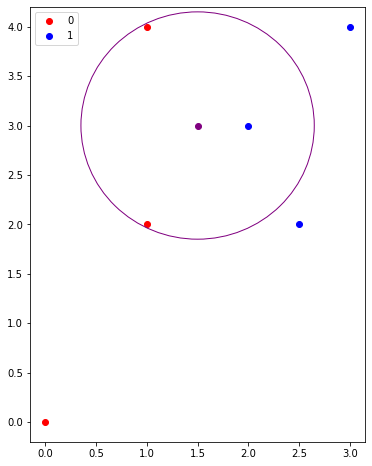

In [ ]:
plt.figure(figsize=(6,8))
plt.scatter(array[0:3,0],array[0:3,1],color='red')
plt.scatter(array[3:,0],array[3:,1],color='blue')
plt.scatter(unknownPoint[0],unknownPoint[1],color='purple')
circle = plt.Circle((unknownPoint[0], unknownPoint[1]), 1.15, color='purple', fill=False)
plt.gcf().gca().add_artist(circle)
plt.legend(['0','1'])
plt.show()

The graph above shows the closest nearest neighbor. If KNN is used the label for the unknown point would be 1.

<h2>Five Nearest Neighbors</h2>

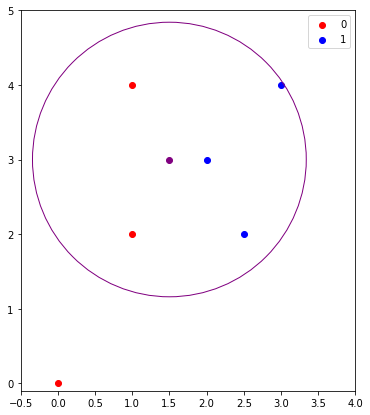

In [ ]:
plt.figure(figsize=(6,7))
plt.scatter(array[0:3,0],array[0:3,1],color='red')
plt.scatter(array[3:,0],array[3:,1],color='blue')
plt.scatter(unknownPoint[0],unknownPoint[1],color='purple')
circle = plt.Circle((unknownPoint[0], unknownPoint[1]), 1.84, color='purple', fill=False)
plt.gcf().gca().add_artist(circle)
plt.legend(['0','1'])
plt.xlim(-0.5,4)
plt.ylim(-0.1,5)
plt.show()

The graph above shows the closest five nearest neighbor. If KNN is used the label for the unknown point would be 1. The circles in each graph give a visualization of the bounded area of the closest points, since the distance from the center to the edge of the circle remains constant in all directions. Throughout this example the label of the unknown point changed depending on the number of nearest neighbors. Therefore, the number of neighbors plays an important role in how the label is determined. Another important factor is the number of data points in a dataset is import. If there are not enough data points, as seen in the previous example, then the label prediction is more likely to be subject to change. 

<h2>Similar Problem</h2>

The following is an example is similar to the one above. Use the same data and the same unknown point to solve. However, instead of using the stardard Euclidean distance formula. Use the following formula to calculate the distancances. The overall label will be the same, but the distances will be different.

$$
D = \sqrt[3]{|(x_2-x_1)|^3+|(y_2-y_1)|^3}
$$

+-----+-----+---------+
|   X |   Y |   Label |
+=====+=====+=========+
| 0   |   0 |       0 |
+-----+-----+---------+
| 1   |   2 |       0 |
+-----+-----+---------+
| 1   |   4 |       0 |
+-----+-----+---------+
| 3   |   4 |       1 |
+-----+-----+---------+
| 2   |   3 |       1 |
+-----+-----+---------+
| 2.5 |   2 |       1 |
+-----+-----+---------+


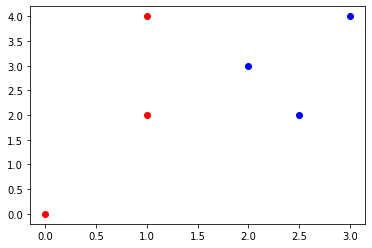

In [ ]:
#Unknown Point
unknownPoint = [1.5,3]
#Create Array
array = np.zeros((6,3))
array[:,:] = [[0,0,0],[1,2,0],[1,4,0],[3,4,1],[2,3,1],[2.5,2,1]]
head = ['X', 'Y','Label']
#Display Table
print(tabulate(array, headers=head, tablefmt="grid"))
#Scatter Plot
plt.scatter(array[0:3,0],array[0:3,1],color='red')
plt.scatter(array[3:,0],array[3:,1],color='blue')
plt.show()

The first task is to determine the closest point to the unknown point. Using the table find all of the Euclidean distances from each point to the unknown point.

For the first point (0,0)
$$
D = \sqrt[3]{|(1.5-0)|^3+|(3-0)|^3}
$$
$$
D = 3.120 
$$
The second point (1,2)
$$
D = \sqrt[3]{|(1.5-1)|^3+|(3-2)|^3}
$$
$$
D = 1.040
$$
The third point (1,4)
$$
D = \sqrt[3]{|(1.5-1)|^3+|(3-4)|^3}
$$
$$
D = 1.040
$$
The fourth point (3,4)
$$
D = \sqrt[3]{|(1.5-3)|^3+|(3-4)|^3}
$$
$$
D = 1.636
$$
The fifth point (2,3)
$$
D = \sqrt[3]{|(1.5-2)|^3+|(3-3)|^3}
$$
$$
D = 0.5
$$
The sixth point (2.5,2)
$$
D = \sqrt[3]{|(1.5-2.5)|^3+|(3-2)|^3}
$$
$$
D = 1.260
$$

In [ ]:
distances = np.zeros((6,3))
distances[:,:] = [[1,np.cbrt((1.5-0)**3+(3-0)**3),0],[2,np.cbrt((1.5-1)**3+(3-2)**3),0],[3,np.cbrt((1.5-1)**3+np.abs((3-4)**3)),0],
                  [4,np.cbrt((1.5-3)**3+np.abs((3-4)**3)),1],[5,np.cbrt(np.abs((1.5-2)**3)+(3-3)**3),1],[6,np.cbrt(np.abs((1.5-2.5))**3+(3-2)**3),1]]
head = ['Point', 'Distance','Label']
print(tabulate(distances, headers=head, tablefmt="grid"))

+---------+------------+---------+
|   Point |   Distance |   Label |
+=========+============+=========+
|       1 |   3.12013  |       0 |
+---------+------------+---------+
|       2 |   1.04004  |       0 |
+---------+------------+---------+
|       3 |  -0.956466 |       0 |
+---------+------------+---------+
|       4 |  -1.63553  |       1 |
+---------+------------+---------+
|       5 |  -0.5      |       1 |
+---------+------------+---------+
|       6 |   0        |       1 |
+---------+------------+---------+


<h2>K-Nearest Neighbors Python Implementation</h2>

The next example shows an implementation of KNN in a real world dataset. The dataset being used is from credit card loan applications. The dataset can be found at https://datahub.io/machine-learning/credit-approval#resource-credit-approval.

The dataset is comprised of 690 rows. Each row represents an individual's application entries. In each row, there is 11 features and a label. The label is represent as 0 if not approved, and 1 if approved.

The first step is to import the desired packages.

In [ ]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import sklearn

The second step is to upload the dataset, randomize it rowise, and label the columns. The dataset is saved on GitHub for easy upload access into Colab.

In [ ]:
url = 'https://raw.githubusercontent.com/estrickler1/OperationsResearchClassification/main/data.csv'
data = pa.read_csv(url)
data = data.sample(n=len(data))     #Randomizer
data.columns = np.arange(len(data.columns))     #Labels Columns

The next step is to clean the dataset. The dataset upload had strings, which the Euclidean distance cannot be calculated from. Since each column with strings only had twp different strings, they were converted to 0 and 1. The third column is dropped due to an unknown error within the dataset.

In [ ]:
data = data.replace('f',int(0))
data = data.replace('t',int(1))
data = data.replace('u',int(0))
data = data.replace('y',int(1))
data = data.replace('a',int(0))
data = data.replace('b',int(1))
data = data.replace('-',int(0))
data = data.replace('+',int(1))
data = data.replace('0',int(0))
data = data.dropna()
data = data.drop(3,axis=1)
data = data.reset_index(drop=True)        #Reindexer

The function below is the KNN algorithm. The first step is to divide the dataset into features and corresponding labels. Next, the features and labels are divided into training and testing arrays. The StandardScaler is used to normalize the features. Then the KNN algorithm is trained on the traing features and labels. Next, the KNN algorithm uses the testing features to predict the testing labels. The accuracy for the testing data is calculated and returned. The accuracy is measure on the testing data to cross-validate K-Nearest Neighbors. Cross-validation is used to measure the preformance of any implentation.

In [ ]:
def KNNAlgorithm(dataset, testPercent, neighbors):
  x = dataset.iloc[:,:-1]
  label = dataset.iloc[:,-1]
  xTrain, xTest, labelTrain, labelTest= train_test_split(x, label, test_size=0.3 testPercent)
  s = StandardScaler()
  s.fit(xTrain)
  xTrain= s.transform(xTrain)
  s.fit(xTest)
  xTest= s.transform(xTest)

  knn= KNN(n_neighbors=neighbors)
  knn.fit(xTrain,labelTrain)
  labelPredict= knn.predict(xTest)
  score = metrics.accuracy_score(labelTest,labelPredict)
  return score

The next funtion is not necessarliy needed. However, due to the way KNN is calculated the function allows the user to find the best number of nearest neighbors and its accuracy.

In [ ]:
def maxAccuracy(dataset, testPercent, maxNeighbors):
  best = 0
  for i in range(3,maxNeighbors):
    score = KNNAlgorithm(dataset,testPercent, i)
    if score > best:
      best = score
      bestNeighbors = i
  return best, bestNeighbors

The following lines are calling the functions to run on the inputted datset.The following lines are calling the functions to run on the inputted datset.

In [ ]:
KNNAlgorithm(data,20,6)

0.75

In [ ]:
maxAccuracy(data,20,10)

(0.9, 4)

<h2>Questions</h2>


1.   What does the k in k-Nearest Neighbors stand for?
2.   Would k-Nearest Neighbors work for a binary system, if so how?
3.   What are the advantages of k-Nearest Neighbors compared to other classification techniques?




<h1></center>Decision Tree

<h1>Introduction</center></h1> 
<font size=5>

Decision tree is a widely used supervised machine learning algorithm. This algorithm can used for regression and classification problems, yet most widely used for classification problems. A decission tree follows a bunch of if-else conditions to picture the n=information and characterize it as per the conditions. For example:



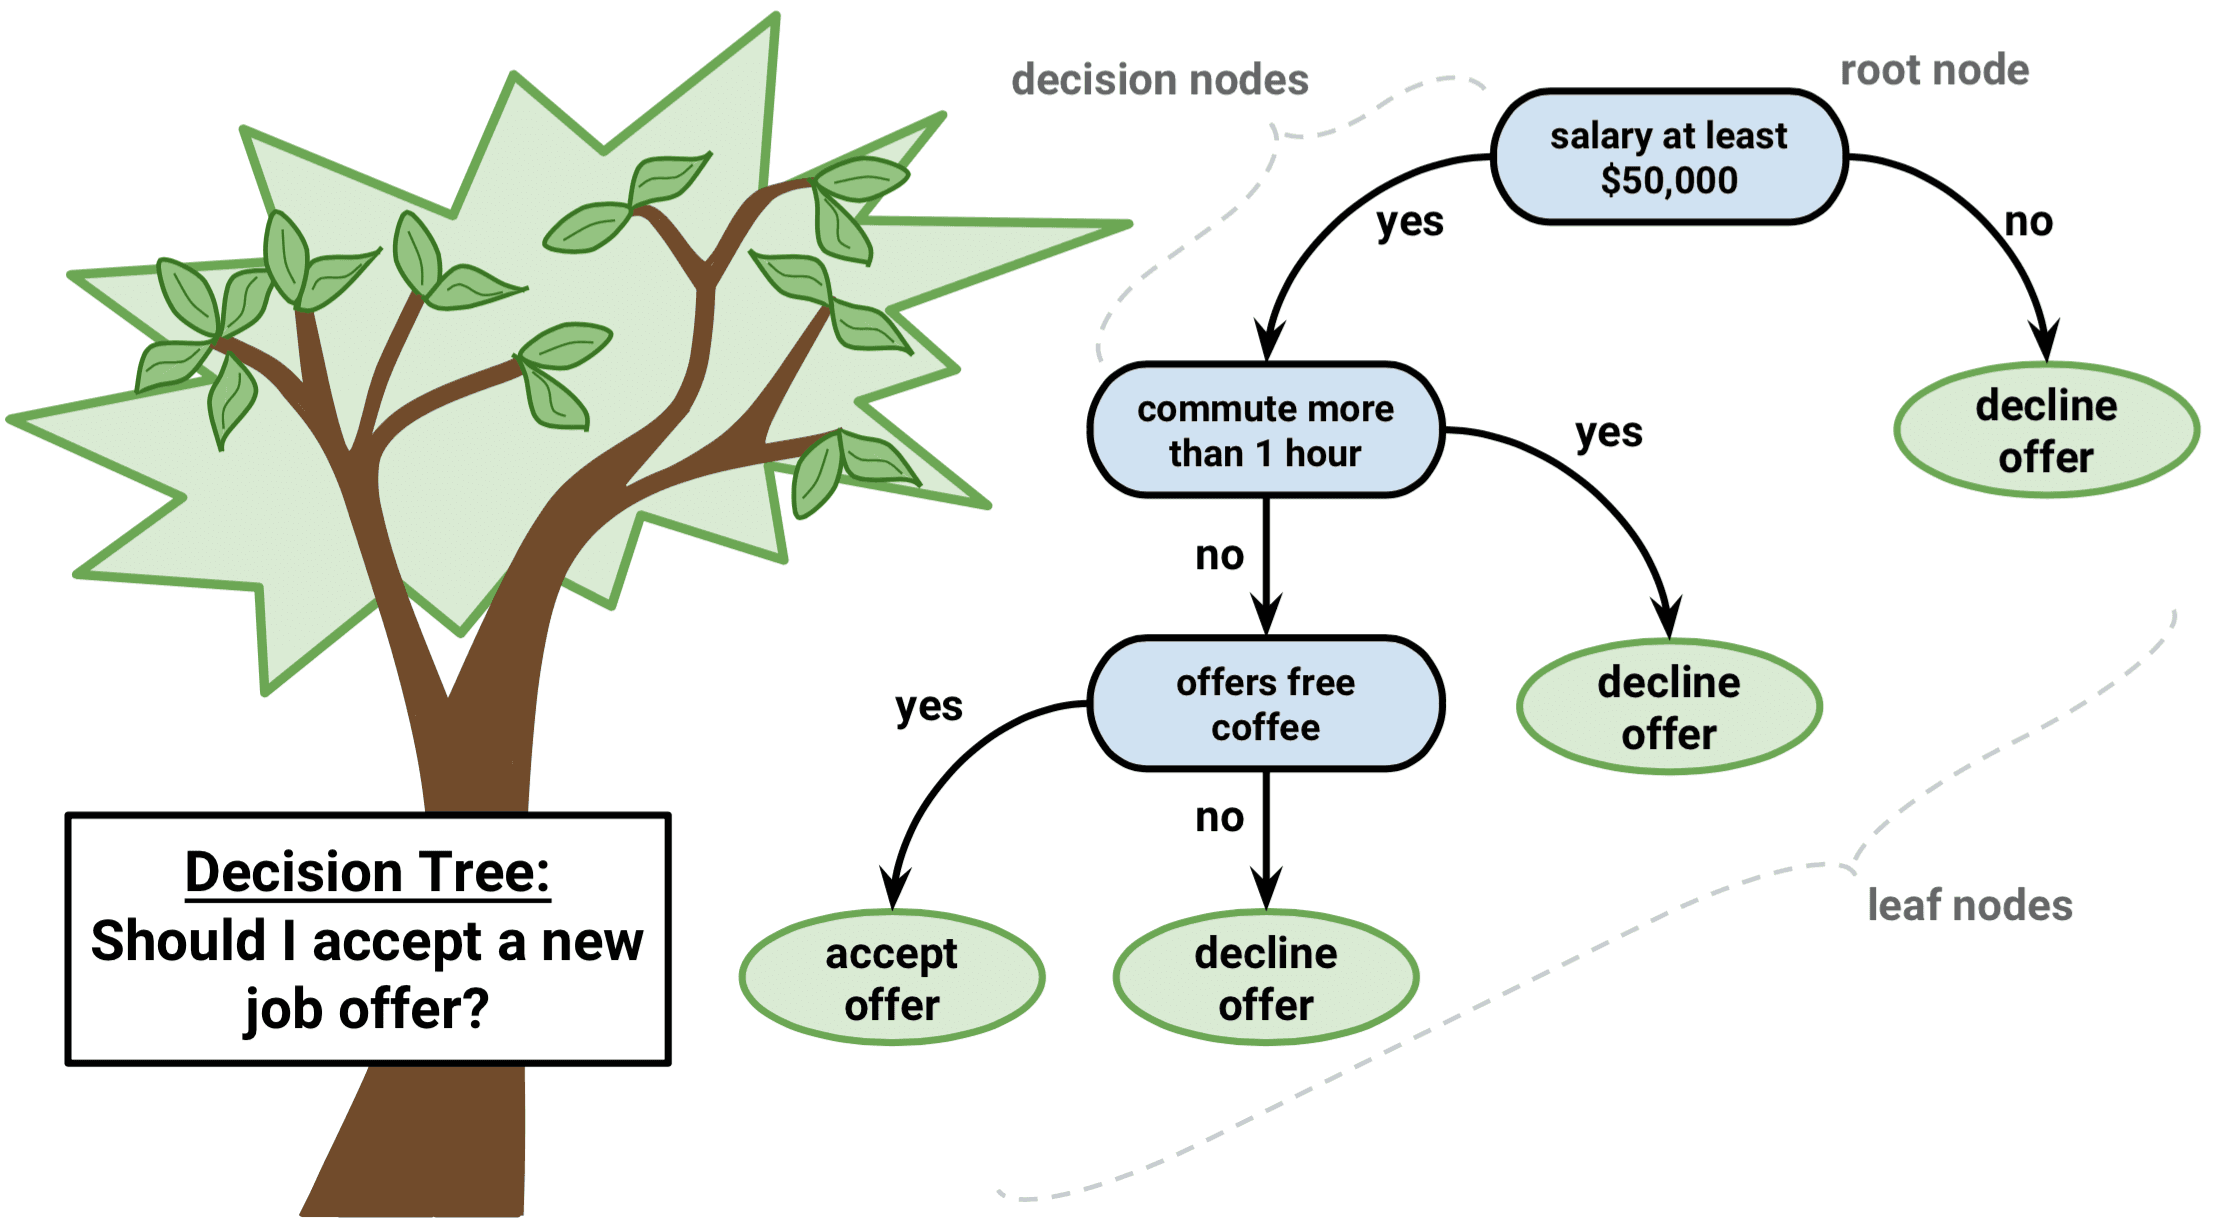

<h1>History</h1>


When we look at the history of decision tree it comes from long way back and when it comes to algorithm it becomes difficult to pinpoint who invented what.When it comes to decision tree it is relatively new however their root can betraced all the way back to Babylonians.When we talked about babylonians they used to  use very advanced civilization who founded many mathematical concepts. One of these concepts was the quadratic($x^2$+bx=c) and cubic equations(a$x^3$+b$x^2$=c) where babylonians thrived somewhere around 2000BC to 500BC

When we come more closer to the civilization history we see more cool innovations such as Aristotle's "categories". He has included text like  "man arges","horse runs" which looks more like decision tree machine learning.
When it comes to modern days in 1963 the department of Statistics at the University of Wisconsin-Madison writes first regression tree. It had an impurity measureand recursively split data into two subjects. In 1966(by Hunt) the Institute of Computing Science in the Pozan University of technology states that one of the first publications on decision tree.In 1972 the first classification tree appeared in the THAID project by Messenger and Mandell, it worked via splitting data to maximize the sum of cases in the modal category.
In 1974 statistics professor Leo Breiman and Charles Stone from Berkeley and Jerome Friedman and Richard Olshen from Stanford started developing the classification and regression tree(CART) algorithm. In 1977 Breiman, Stone, Friedman, and Olshen invented the first cart version. In 1984 the official publication with a CART software which was a revalotion in the world of algorithms.Later in 1986 John Ross Quinlan proposed a new concept; tree with multiple answers. Quinal invented ID3(Iterative Dichotomiser 3) using an impurity criterion called gain ratio.



<h1><center>How Does Decision Tree Work?</center></h1>
<font size=5>
Decision tree also works like a human mind whenever we try to solve any problem our first step starts with a question. In a similar way in a decision tree the datas are seperated step by step. Here data would isolate in remarkable pices and, at long last, we would divide tests which is the pitch of whole concept.
Here are some termonology in order to understand concept fo bata mining better:


1.   Node: Nodes are every oblect in a tree. It contains subest of data, and excluding leaf nodes, a question splits the subset.
2.   Parent node: Parent node is a node that makes a data split.
3.   Child Node: Child node is a resulting node. It can also be a parent for its children.
4.   Leaf node: Leaf node is a final node with no other final questions.
5.   Branch: Branch is a unique line of the questions with answers that flow to a leaf node
6.   Root: It is the top node.






<h1><center>Gini Index</center></h1>
Gini Index, otherwise called Gini impurity, works out the measure of probability of a particular component that is grouped erroneously when chosen arbitrarily. In the event that every one of the components are connected with a solitary class, it very well may be called pure.

Lets see the measure of the Gini Index, similar to the properties of entropy, the Gini list changes between values 0 and 1, where 0 expresses the purity of arrangement, for example, Every one of the components have a place with a predefined class or just one class exists there. Also, 1 demonstrates the irregular dissemination of components across different classes. The worth of 0.5 of the Gini Index shows an equivalent circulation of components over certain classes.

While planning the choice tree, the highlights having minimal worth of the Gini Index would get preferred. We can become familiar with another tree-based algorithm(Random Forest).
The Gini Index is dictated by deducting the amount of squared of probabilities of each class from one, numerically, Gini Index can be shown as:

\begin{align}
\mathbf{Gini Index} =1- \sum_{i=1}^n (P_i)^2
\end{align}





In [ ]:
import numpy as np
import pandas as pa
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
url = 'https://raw.githubusercontent.com/rajatlamsalecok/OperationsResearchClassification/main/diabetes.csv'
data = pa.read_csv(url,header=None, names=col_names)
#data = data.sample(n=len(data))     #Randomizer
#data.columns = np.arange(len(data.columns))     #Labels Columns


In [ ]:
data = data.drop([0,0])

In [ ]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


<h1><center>References</center></h1>

<h6>Fix, E., Hodges, J.L. Discriminatory analysis, nonparametric discrimination: Consistency properties. Technical Report 4, USAF School of Aviation Medicine, Randolph Field, Texas, 1951.</h6>

<h6>Merriam-Webster. (n.d.). Classification. Merriam-Webster. Retrieved October 26, 2021, from https://www.merriam-webster.com/dictionary/classification. </h6>

<h6>Weinberger, K. Q., Blitzer, J., &amp; Saul, L. K. (n.d.). Distance metric learning for large margin ... - neurips. Retrieved October 26, 2021, from https://proceedings.neurips.cc/paper/2005/file/a7f592cef8b130a6967a90617db5681b-Paper.pdf. </h6>

<h1>Authors</h1>

Principal authors of this chapter were: Avishu Lamsal; Rajat Lamsal; Ethan Strickler